In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [2]:
#1. How many records are present in the dataset?

print(df.shape[0])

149


In [3]:
#2. How many movies got released in each genre? Sort number of releases in each genre in descending order.

df['Genre'] = df['Genre'].str.strip()
gen=df['Genre']
count=gen.value_counts(sort=True, ascending=False)

count

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [4]:
#3. Which genre had highest number of releases?

count.head(1)

Comedy    36
Name: Genre, dtype: int64

In [5]:
#4. How many movies in each genre got released in different release times like long weekend, festive season, etc.

genrevstime=pd.crosstab(df.Genre, df.ReleaseTime)
genrevstime

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [6]:
#5. Which month of the year, maximum number movie releases are seen?

df['month']=pd.DatetimeIndex(df['Release Date']).month

# print(month)
count1=df['month'].value_counts(sort=True, ascending=False)

count1.head(1)

1    20
Name: month, dtype: int64

In [7]:
#6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

df2=df[df['Budget']>25]

count1=df2['month'].value_counts(sort=True, ascending=False)

count1.head(1)

2    9
Name: month, dtype: int64

In [8]:
#7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']

df['ROI'].head(10)

0    1.888889
1    0.200000
2   -0.600000
3   -0.950000
4   -0.400000
5    4.000000
6   -0.180000
7    0.212121
8   -0.129032
9   -0.995000
Name: ROI, dtype: float64

In [9]:
#9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

correlation= df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print(correlation)
if( correlation>0):
    print("positive")
else:
    print("negative")

0.6825165877731297
positive


Genre with most number of Youtube likes: 
Action
401873


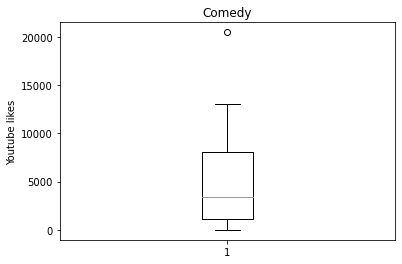

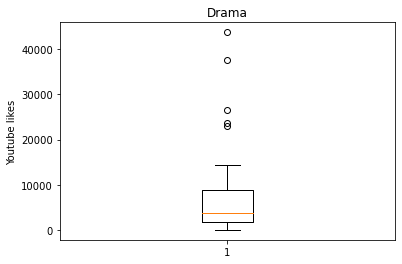

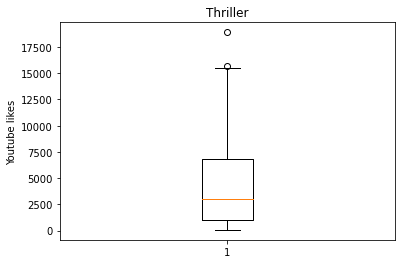

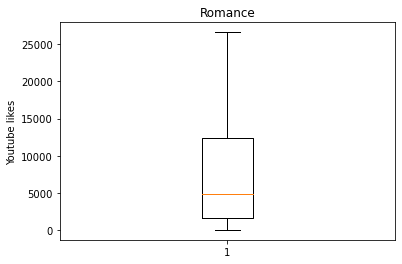

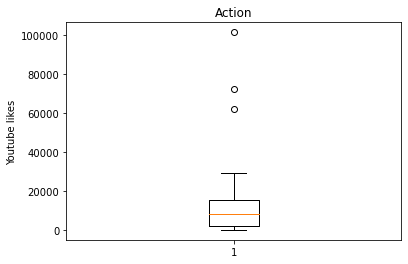

In [10]:
#10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

gen1=df[df['Genre']=="Comedy"]
sum1=gen1['YoutubeLikes'].sum()

gen2=df[df['Genre']=="Drama"]
sum2=gen2['YoutubeLikes'].sum()

gen3=df[df['Genre']=="Thriller"]
sum3=gen3['YoutubeLikes'].sum()

gen4=df[df['Genre']=="Romance"]
sum4=gen4['YoutubeLikes'].sum()

gen5=df[df['Genre']=="Action"]
sum5=gen5['YoutubeLikes'].sum()

sum={'Genre' :["Comedy", "Drama", "Thriller", "Romance", "Action" ],
    'Sum': [sum1, sum2, sum3, sum4, sum5]}
likes= pd.DataFrame(sum)

likes

maxLikes=likes['Sum'].idxmax()
print("Genre with most number of Youtube likes: ")
print(likes.iat[maxLikes,0])
print(likes['Sum'].max())

# ax1 =sns.boxplot(x=gen1['YoutubeLikes'])
# ax2 =sns.boxplot(x=gen2['YoutubeLikes'])
# ax3 =sns.boxplot(x=gen3['YoutubeLikes'])
# ax4 =sns.boxplot(x=gen4['YoutubeLikes'])
# ax5 =sns.boxplot(x=gen5['YoutubeLikes'])

plt.boxplot(gen1['YoutubeLikes'])
plt.title("Comedy")
plt.ylabel("Youtube likes")
plt.show()
plt.boxplot(gen2['YoutubeLikes'])
plt.title("Drama")
plt.ylabel("Youtube likes")
plt.show()
plt.boxplot(gen3['YoutubeLikes'])
plt.title("Thriller")
plt.ylabel("Youtube likes")
plt.show()
plt.boxplot(gen4['YoutubeLikes'])
plt.title("Romance")
plt.ylabel("Youtube likes")
plt.show()
plt.boxplot(gen5['YoutubeLikes'])
plt.title("Action")
plt.ylabel("Youtube likes")
plt.show()

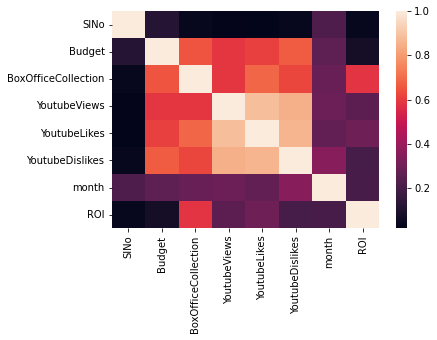

YoutubeViews and YoutubeLikes are the most correlated values


In [11]:
#11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

sns.heatmap(df.corr())
plt.show()

print("YoutubeViews and YoutubeLikes are the most correlated values")

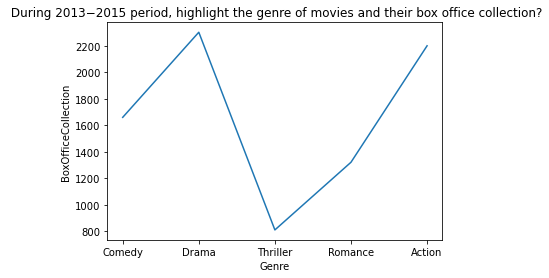

,Genre,Sum
0,Comedy,1660.14
1,Drama,2302.76
2,Thriller,810.15
3,Romance,1321.03
4,Action,2200.34


In [12]:
#12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

df['year']=pd.DatetimeIndex(df['Release Date']).year

df2=df[df['year']>2012]
df2=df[df['year']<2016]

gen1=df2[df2['Genre']=="Comedy"]
sum1=gen1['BoxOfficeCollection'].sum()

gen2=df2[df2['Genre']=="Drama"]
sum2=gen2['BoxOfficeCollection'].sum()

gen3=df2[df2['Genre']=="Thriller"]
sum3=gen3['BoxOfficeCollection'].sum()

gen4=df2[df2['Genre']=="Romance"]
sum4=gen4['BoxOfficeCollection'].sum()

gen5=df2[df2['Genre']=="Action"]
sum5=gen5['BoxOfficeCollection'].sum()

sum={'Genre' :["Comedy", "Drama", "Thriller", "Romance", "Action" ],
    'Sum': [sum1, sum2, sum3, sum4, sum5]}
df3= pd.DataFrame(sum)

plt.plot(df3['Genre'], df3['Sum'])
plt.title(" During 2013−2015 period, highlight the genre of movies and their box office collection?")
plt.xlabel("Genre")
plt.ylabel("BoxOfficeCollection")
plt.show()
df3


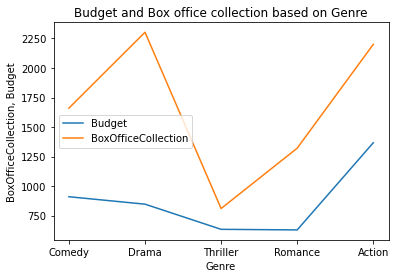

,Genre,Budget,BoxOfficeCollection
0,Comedy,910,1660.14
1,Drama,847,2302.76
2,Thriller,634,810.15
3,Romance,629,1321.03
4,Action,1367,2200.34


In [13]:
#13. Visualize the Budget and Box office collection based on Genre.

gen1=df[df['Genre']=="Comedy"]
sum1=gen1['Budget'].sum()
summ1=gen1['BoxOfficeCollection'].sum()

gen2=df[df['Genre']=="Drama"]
sum2=gen2['Budget'].sum()
summ2=gen2['BoxOfficeCollection'].sum()

gen3=df[df['Genre']=="Thriller"]
sum3=gen3['Budget'].sum()
summ3=gen3['BoxOfficeCollection'].sum()

gen4=df[df['Genre']=="Romance"]
sum4=gen4['Budget'].sum()
summ4=gen4['BoxOfficeCollection'].sum()

gen5=df[df['Genre']=="Action"]
sum5=gen5['Budget'].sum()
summ5=gen5['BoxOfficeCollection'].sum()

sum={'Genre' :["Comedy", "Drama", "Thriller", "Romance", "Action" ],
    'Budget': [sum1, sum2, sum3, sum4, sum5],
    'BoxOfficeCollection': [summ1, summ2, summ3, summ4, summ5]}
df3= pd.DataFrame(sum)
df3

plt.plot(df3['Genre'], df3['Budget'], label="Budget")
plt.plot(df3['Genre'], df3['BoxOfficeCollection'], label="BoxOfficeCollection")
plt.title("Budget and Box office collection based on Genre")
plt.xlabel("Genre")
plt.ylabel("BoxOfficeCollection, Budget")
plt.legend()
plt.show()
df3

<function matplotlib.pyplot.show(close=None, block=None)>

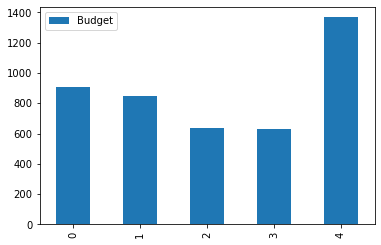

In [14]:
#14. Find the distribution of movie budget for every Genre.

# plt.hist(df3[['Genre', 'Budget']])

df3[['Genre', 'Budget']].plot(kind='bar')
plt.show

,Year,No of releases
0,2013,67
1,2014,137
2,2015,149


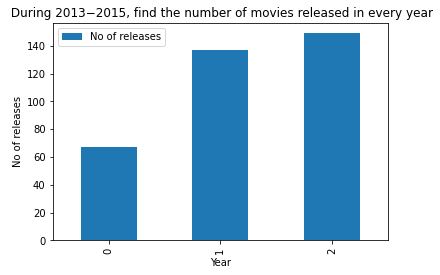

In [15]:
#15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

year1=df[df['year']>2012]
year1=df[df['year']<2014]

yr1= year1['SlNo'].nunique()

year2=df[df['year']>2013]
year2=df[df['year']<2015]

yr2= year2['SlNo'].nunique()

year3=df[df['year']>2014]
year3=df[df['year']<2016]

yr3= year3['SlNo'].nunique()

sum={'Year' :["2013", "2014", "2015"],
    'No of releases': [yr1, yr2, yr3]}
releases= pd.DataFrame(sum)

releases[['Year', 'No of releases']].plot(kind='bar')
plt.title(" During 2013−2015, find the number of movies released in every year")
plt.xlabel("Year")
plt.ylabel("No of releases")
plt.show

releases